Adin Adler

aadler

The module I worked with is statsmodels. It's documentation can be found at http://www.statsmodels.org/stable/index.html.
statsmodels uses Pandas/Numpy dataframes so most of my code will assume some basic understanding of numpy/pandas.

I will be focusing primarily on graphics and visuals to show the wide range of methods that statsmodels has.

In [14]:
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

One of the coolest features about statsmodels is that you can pair pandas dataframes with R-styled code lines, or numpy's ndarrays with statsmodels python formulas. Since a lot of statisticians don't have background in python statsmodels allows them to use their R knowledge in their programs.

For this case we will look at an Ordinary Least Squares regression and how Statsmodels handles it using modules we have already learned about such as pandas or matplotlib. Statsmodels focuses on providing relevant statistics information and compatabiity with a wide variety of datasets.

In this example we will use some crime data that comes with the pandas module. We wil first load in the data and see what we have to work with.



In [15]:
data = sm.datasets.statecrime.load_pandas().data
print data.head()
print "------------"
print data.dtypes

            violent  murder  hs_grad  poverty  single  white  urban
state                                                              
Alabama       459.9     7.1     82.1     17.5    29.0   70.0  48.65
Alaska        632.6     3.2     91.4      9.0    25.5   68.3  44.46
Arizona       423.2     5.5     84.2     16.5    25.7   80.0  80.07
Arkansas      530.3     6.3     82.4     18.8    26.3   78.4  39.54
California    473.4     5.4     80.6     14.2    27.8   62.7  89.73
------------
violent    float64
murder     float64
hs_grad    float64
poverty    float64
single     float64
white      float64
urban      float64
dtype: object


You can see this dataset has a lot of different columns that could interesting to work with. I'm going to run through a sample problem in the next few frames.

Let's say we wanted to see how much correlation there is between the poverty and single columns to murder. Using Statsmodels we can do this very easily. Notice how both pandas and matplotlib are involved in our calculations.

Here we set our X axis to be poverty and graduation high school (along with a bias). Our Y axis is just the murder column.

We then fit the data to an ordinary least squares regresion and graph it. Don't forget the bias column!

You can set your title using the .set_title feature under the ax parameter which is the axis.

In [16]:
murder = data.loc[:,'murder']
causes = data[['poverty','single']]
causes['bias'] = 1
X = causes.loc[:,['poverty','single','bias']]
print X.head()
print "---------"
Y = murder
print Y.head()
model = sm.OLS(Y,X)
results = model.fit()

            poverty  single  bias
state                            
Alabama        17.5    29.0     1
Alaska          9.0    25.5     1
Arizona        16.5    25.7     1
Arkansas       18.8    26.3     1
California     14.2    27.8     1
---------
state
Alabama       7.1
Alaska        3.2
Arizona       5.5
Arkansas      6.3
California    5.4
Name: murder, dtype: float64


C:\Users\Adin\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


You can also rename your x and y axis using ax.set_?label, replacing ? with [x,y] (note that the title does not hold between graphs since we have to recall plt.sublplots() to display the graph).

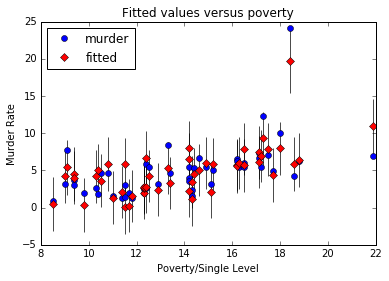

In [17]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("Murder Rate")
ax.set_xlabel("Poverty/Single Level")
plt.show()

What about if I wanted to change the scaling to zoom in on the denser area with muder <15? the .set_?lim for [x,y] will change your margins.

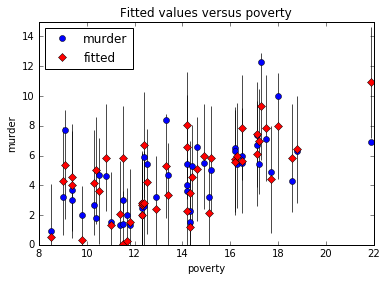

In [18]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylim([0,15])
plt.show()

You can also relabel the labels inside the legend (not sure why I get two dots/diamonds) by assigning the legend to a variable and then reassigning the text.

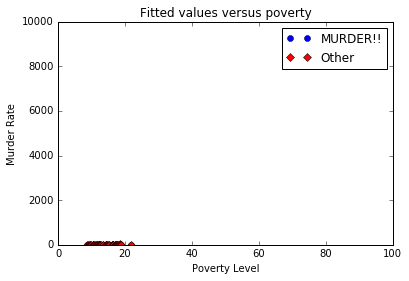

In [19]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("Murder Rate")
ax.set_xlabel("Poverty Level")
ax.set_ylim([0,10000])
ax.set_xlim([0,100])
L=plt.legend()
L.get_texts()[0].set_text('MURDER!!')
L.get_texts()[1].set_text('Other')
L.loc = "top left"


The extreme example when you overscale your x-axis and y-axis.

What if we wanted to compare this graph to just evaluating the poverty column? We can plot both of these directly next to each other using subplots, which dictate rows/columns/index. In this case ax is equal to the 2 rows/1 column/1st spot. ax2 is equal to the 2 rows/1 column/2nd spot. setting the title of ax2 is because the spacing would overlay the title on the axis name of the top graph. The other alternative to using subplots is to just graph two plots, one on top of the other. While both graphic options work it may be easier to see connections on the subplots, especially if you have 3 or 4 graphs that you want to examine.

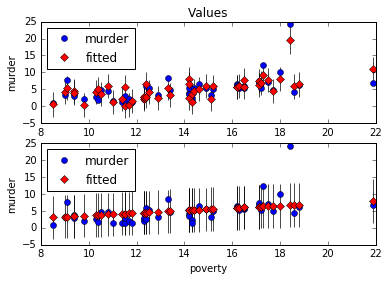

In [20]:
newX = causes.loc[:,'poverty']
Y = murder

model = sm.OLS(Y,X)
model2 = sm.OLS(Y,newX)
results = model.fit()
results2 = model2.fit()
fig = plt.figure()
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = sm.graphics.plot_fit(results,0,ax=ax)
fig = sm.graphics.plot_fit(results2,0,ax=ax2)
ax2.set_title("")
ax.set_title("Values")
plt.show()




We can also run standard tests using the Statsmodels library.

The most useful graphic is using results.summary() which provides a complete summary of the data. The overall summary page gives you most of the information that a statistician could be looking for. What is especially cool is that you can access any component of the summary by accessing the attribute from your results. An example below shows how you can compare using both variables versus just the poverty variable.

In [21]:
print results.summary()
povertyRsquared = results2.rsquared
rSquared = results.rsquared
if rSquared >= povertyRsquared:
    print "using both variables is a better fit"
else:
    print "Just using poverty is a better fit"
print rSquared,povertyRsquared

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     87.77
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           9.24e-17
Time:                        12:46:16   Log-Likelihood:                -98.609
No. Observations:                  51   AIC:                             203.2
Df Residuals:                      48   BIC:                             209.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
poverty        0.1690      0.090      1.875      0.0

You can also run tests on your data using built in fuctions. The next example initializes a variable that tests for the linear rainbow test, which is just one of the many additional easy methods Statsmodels has. This output is the output for the linear rainbow test. Most other tests are similar in style, just 1 line dictating what you want to know about your dataset.

In [22]:
rainbow = sm.stats.linear_rainbow(results)
print rainbow

(0.78266502140285366, 0.72730113545051511)


## statsmodels.graphics 

This next section will cover the ways you can graph your data using the statsmodels.graphics package. It covers most types of single variable plots.

A lot of information about statsmodels.graphics can be found at http://statsmodels.sourceforge.net/stable/graphics.html

## Probability Plots
When you are working with probabilities or want to map your data to a something like a uniform distribution function There are 4 main plots that you may wish to construct

1) A qqplot which is concerned with the inner quantiles of the data

2) A ppplot which is concerned with percentiles of the graph (probability you are above a threshold)

3) A probplot which is identical to the qqplot however the bottom scale is probabilities rather than quantiles

4) A qqplot 2 samples which takes 2 probplots and plots them against each other.

In this example I want to make note of the np.random.seed(0) which specifies that I am going to be using ranodm numbers. However, each time I specify np.random.seed(0) the same sequence of 100 numbers is used, such that if I wanted to reuse the sequence I just recall that random seed. When I don't use the random seed, such as the variable comp, you can see the output differs from the other 2 variables using the seed, data2 and data3.

To set up a goodness of fit plots all you have to do is initialize your dataset, apply it to a goodness of fit plot, then graph it. You can see four graphs being shown, one is for each of the examples above. Notice how the axis labels and values change based on which type of plot I use. 


[ 0.67781654  0.27000797  0.73519402  0.96218855  0.24875314] This is the comp first 5 outputs 

[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548 ] This is the data2 first 5 outputs 

[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548 ] This is the data3 first 5 outputs


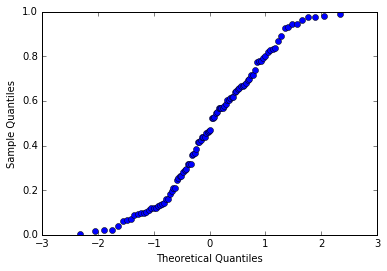

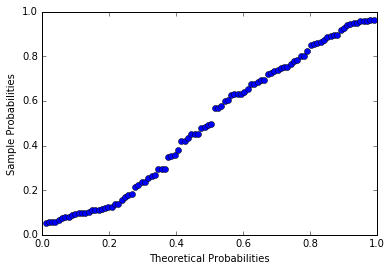

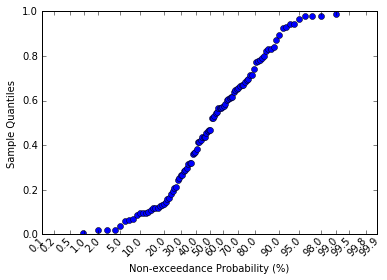

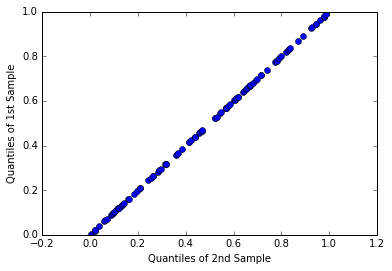

In [23]:
np.random.seed(0)
data = np.random.rand(100)
np.random.seed(0)
data2 = np.random.rand(100)
comp = np.random.rand(100)
print comp[:5],"This is the comp first 5 outputs \n"
print data2[:5],"This is the data2 first 5 outputs \n"
np.random.seed(0)
data3 = np.random.rand(100)
print data3[:5],"This is the data3 first 5 outputs"
probplot = statsmodels.graphics.gofplots.ProbPlot(data)
prob1 = sm.ProbPlot(data)
prob2 = sm.ProbPlot(data2)
probplot2 = statsmodels.graphics.gofplots.ProbPlot(data2)
probplot3 = statsmodels.graphics.gofplots.ProbPlot(data3)
probplot.qqplot()
probplot2.ppplot()
probplot3.probplot()
statsmodels.graphics.gofplots.qqplot_2samples(prob1, prob2)
plt.show()

## Side By Side Boxplots
Similar to the graphs above for probability plots you can also expand to other useful statistical graphics. This next section will cover boxplots, which split the data into quarters to see how vast the data is. Using np.random.seed(1) creates a different seed from np.random.seed(0) but can be sued in the same way.

There are 2 types of boxplots covered, violin plots and bean plots. Both are named for the shape of the graph they make (Hopefully you can tell which is which). The bottom 2 are violin plots (as suggested by the function call)

Boxplots are interesting since the comparison for side by side boxplots is about the range of the data rather than a value comparison. What this means is that the two data sets you pass in as variables do not have to be the same length. You can also compare a bunch of different boxplots on the same graph, not just 1 or 2 which is a large plus in comparing 5 or 6 sets of similar data.


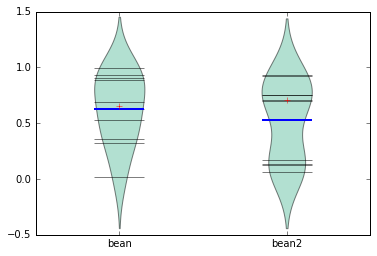

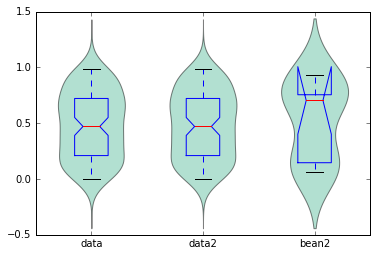

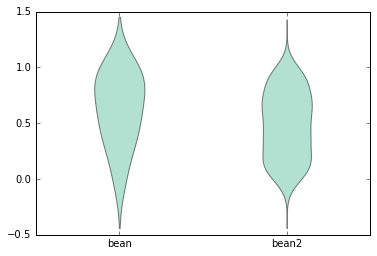

In [24]:
np.random.seed(1)
data = np.random.rand(100)
np.random.seed(1)
data2 = np.random.rand(100)
bean1 = np.random.rand(10)
bean2 = np.random.rand(10)
graph2 = statsmodels.graphics.boxplots.beanplot([bean1,bean2],labels = ["bean","bean2"])
graph = statsmodels.graphics.boxplots.violinplot([data,data2,bean2],labels = ["data","data2","bean2"])
graph2 = statsmodels.graphics.boxplots.violinplot([bean1,data2],labels = ["bean","bean2"],show_boxplot = False)

## Correlation Plots
In this final section I will talk about how to graph a correlation plot. The input to this function is a numpy ndarray, specifically a square ndarray. Instead of computing the correlation we can just call np.corrcoef() which will create the square matrix needed to input to the correlation plot.

note: Using plt.show() is not essential to displaying your graphs but without it the graphs may be buggy as I show after these graphs.


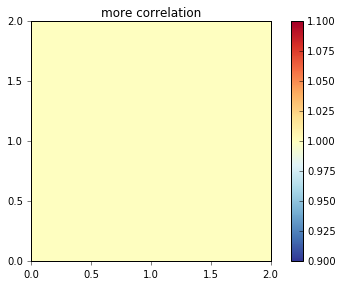

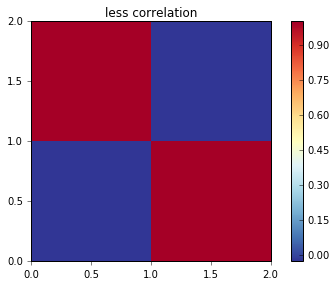

In [25]:
np.random.seed(1)
data = np.random.rand(100)
np.random.seed(1)
data2 = np.random.rand(100)
data3 = np.random.rand(100)

corr = np.corrcoef(data,data2)
corr2 = np.corrcoef(data,data3)

statsmodels.graphics.correlation.plot_corr(corr,title="more correlation")
statsmodels.graphics.correlation.plot_corr(corr2,title="less correlation")
plt.show()

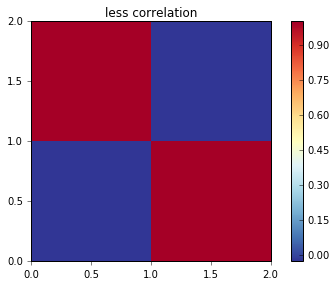

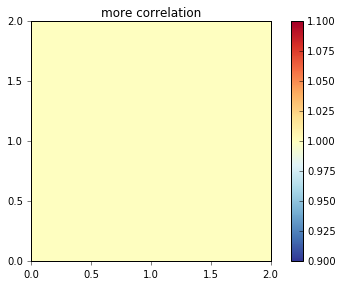

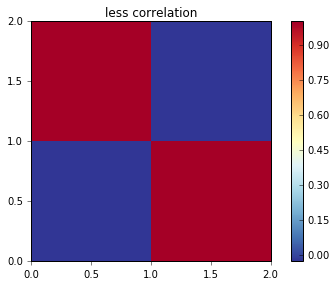

In [26]:
statsmodels.graphics.correlation.plot_corr(corr,title="more correlation")
statsmodels.graphics.correlation.plot_corr(corr2,title="less correlation")


For some reason without using plt.show() you display 3 graphs instead of 2, but I guess that's cool right?

## Conclusion

Statsmodels is a fantastic package for a wide array of graphs, calculations, and other statistical applications. The package is very easy to use and durable to several different styles of graphics and visuals. I would advise using this package in situations where you want to provide both graphical evidence and statistical evidence, because that's what Statsmodels excels at.